<a href="https://colab.research.google.com/github/chemoinformatics-lecture/lecture-beginner/blob/main/lesson04_RDKit/lecture_note_colab_RDKit_no3_%E5%88%86%E5%AD%90%E3%81%AE%E5%8F%96%E3%82%8A%E6%89%B1%E3%81%84%E6%96%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RDKitの分子を取り扱う

# 環関係

ringinfo = mol.GetRingInfo()<br>
ringinfo.NumRings()

# 結合関係

bonds_info = mol.GetBonds()<br>
bond.GetBondType()<br>
begin_atom = bond.GetBeginAtom()<br>
begin_atom.GetSymbol()<br>
end_atom = bond.GetEndAtom()<br>
end_atom.GetSymbol()<br>
atoms_info = mol.GetAtoms()<br>

# 原子関係

atoms_info = mol.GetAtoms()<br>
atom.GetIdx()<br>
atom.GetSymbol()<br>
atom.GetNumRadicalElectrons()<br>
atom.GetFormalCharge()<br>

In [1]:
# rdkitのインストール
!pip install rdkit
#pubchempyのインストール
!pip install pubchempy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 36.8 MB 452 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pubchempy: filename=PubChemPy-1.0.4-py3-none-any.whl size=13834 sha256=ee475faac9fbfbd045adda83f8e064b531de4c2fc256c26c3424ffb60908d480
  Stored in directory: /root/.cache/pip/wheels/7c/3d/8c/8192697412e9899dc55bbbb08bbc1197bef333caaa2a71c448
Successfully built pubchempy


In [2]:
import platform
# 使用しているOSを表示
platform.platform()

'Linux-5.4.188+-x86_64-with-Ubuntu-18.04-bionic'

In [3]:
# pythonのversionを表示
!python -V

Python 3.7.13


In [4]:
import pubchempy as pcp
# pcpと略すのが一般的
# pubchemのversionを表示
pcp. __version__

'1.0.4'

In [5]:
import pandas as pd
# pdと略すのが一般的
# pandasのversionを表示
pd.__version__

'1.3.5'

In [9]:
from rdkit import rdBase, Chem
from rdkit.Chem import AllChem, Draw
print(rdBase.rdkitVersion)

2022.03.5


In [10]:
compoud = "quercetine"

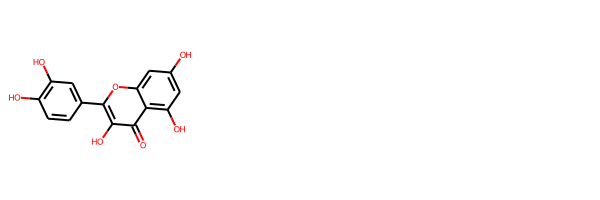

In [11]:
pcp_compoud = pcp.get_compounds(compoud, 'name')
compoud_smiles = pcp_compoud[0].isomeric_smiles
mol = Chem.MolFromSmiles(compoud_smiles)
Draw.MolsToGridImage([mol])

## 環の情報

In [12]:
ringinfo = mol.GetRingInfo()
ringinfo

In [13]:
ringinfo.NumRings()

3

## 結合の情報

In [14]:
bonds_info = mol.GetBonds()

In [15]:
len(bonds_info)

24

In [16]:
for bond in bonds_info:
    print("-------------------------")
    begin_atom = bond.GetBeginAtom()
    end_atom = bond.GetEndAtom()
    print(begin_atom.GetSymbol())
    print(end_atom.GetSymbol())
    print (bond.GetBondType())

-------------------------
C
C
AROMATIC
-------------------------
C
C
AROMATIC
-------------------------
C
C
AROMATIC
-------------------------
C
C
AROMATIC
-------------------------
C
C
AROMATIC
-------------------------
C
C
SINGLE
-------------------------
C
C
AROMATIC
-------------------------
C
C
AROMATIC
-------------------------
C
O
DOUBLE
-------------------------
C
C
AROMATIC
-------------------------
C
C
AROMATIC
-------------------------
C
C
AROMATIC
-------------------------
C
C
AROMATIC
-------------------------
C
C
AROMATIC
-------------------------
C
C
AROMATIC
-------------------------
C
O
AROMATIC
-------------------------
C
O
SINGLE
-------------------------
C
O
SINGLE
-------------------------
C
O
SINGLE
-------------------------
C
O
SINGLE
-------------------------
C
O
SINGLE
-------------------------
C
C
AROMATIC
-------------------------
O
C
AROMATIC
-------------------------
C
C
AROMATIC


## 原子の情報

In [17]:
compoud_smiles

'C1=CC(=C(C=C1C2=C(C(=O)C3=C(C=C(C=C3O2)O)O)O)O)O'

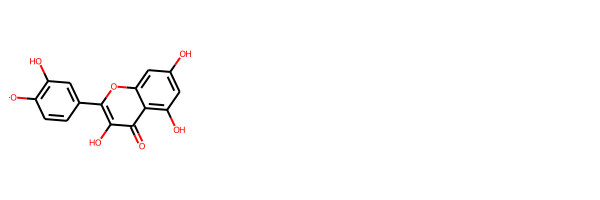

In [18]:
# 1つの原子をラジカルにしてみる。
mol = Chem.MolFromSmiles("C1=CC(=C(C=C1C2=C(C(=O)C3=C(C=C(C=C3O2)O)O)O)O)[O]")
Draw.MolsToGridImage([mol])

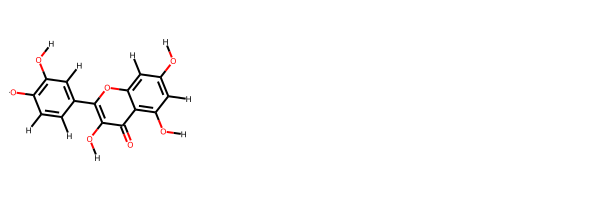

In [19]:
mol = Chem.AddHs(mol)
Draw.MolsToGridImage([mol])

In [20]:
atoms_info = mol.GetAtoms()
len(atoms_info)

31

In [21]:
#原子の情報色々を取得できる。
for atom in atoms_info:
    print("---" * 10)
    print(atom.GetIdx(), end=(":"))
    print(atom.GetSymbol())
    print("radical:" + str(atom.GetNumRadicalElectrons()) )
    print("charge:"+ str(atom.GetFormalCharge()))

------------------------------
0:C
radical:0
charge:0
------------------------------
1:C
radical:0
charge:0
------------------------------
2:C
radical:0
charge:0
------------------------------
3:C
radical:0
charge:0
------------------------------
4:C
radical:0
charge:0
------------------------------
5:C
radical:0
charge:0
------------------------------
6:C
radical:0
charge:0
------------------------------
7:C
radical:0
charge:0
------------------------------
8:C
radical:0
charge:0
------------------------------
9:O
radical:0
charge:0
------------------------------
10:C
radical:0
charge:0
------------------------------
11:C
radical:0
charge:0
------------------------------
12:C
radical:0
charge:0
------------------------------
13:C
radical:0
charge:0
------------------------------
14:C
radical:0
charge:0
------------------------------
15:C
radical:0
charge:0
------------------------------
16:O
radical:0
charge:0
------------------------------
17:O
radical:0
charge:0
--------------------

In [22]:
for atom in atoms_info:
    if atom.GetNumRadicalElectrons() >= 1:
        print(atom.GetIdx(), end=(":"))
        print(atom.GetSymbol())

21:O
